importing liberaries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

frist step : Data Exploration and Preprocessing

In [ ]:
df = pd.read_csv('CC GENERAL.csv')
print("Dataset Info:")
print(df.info())
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64

In [ ]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


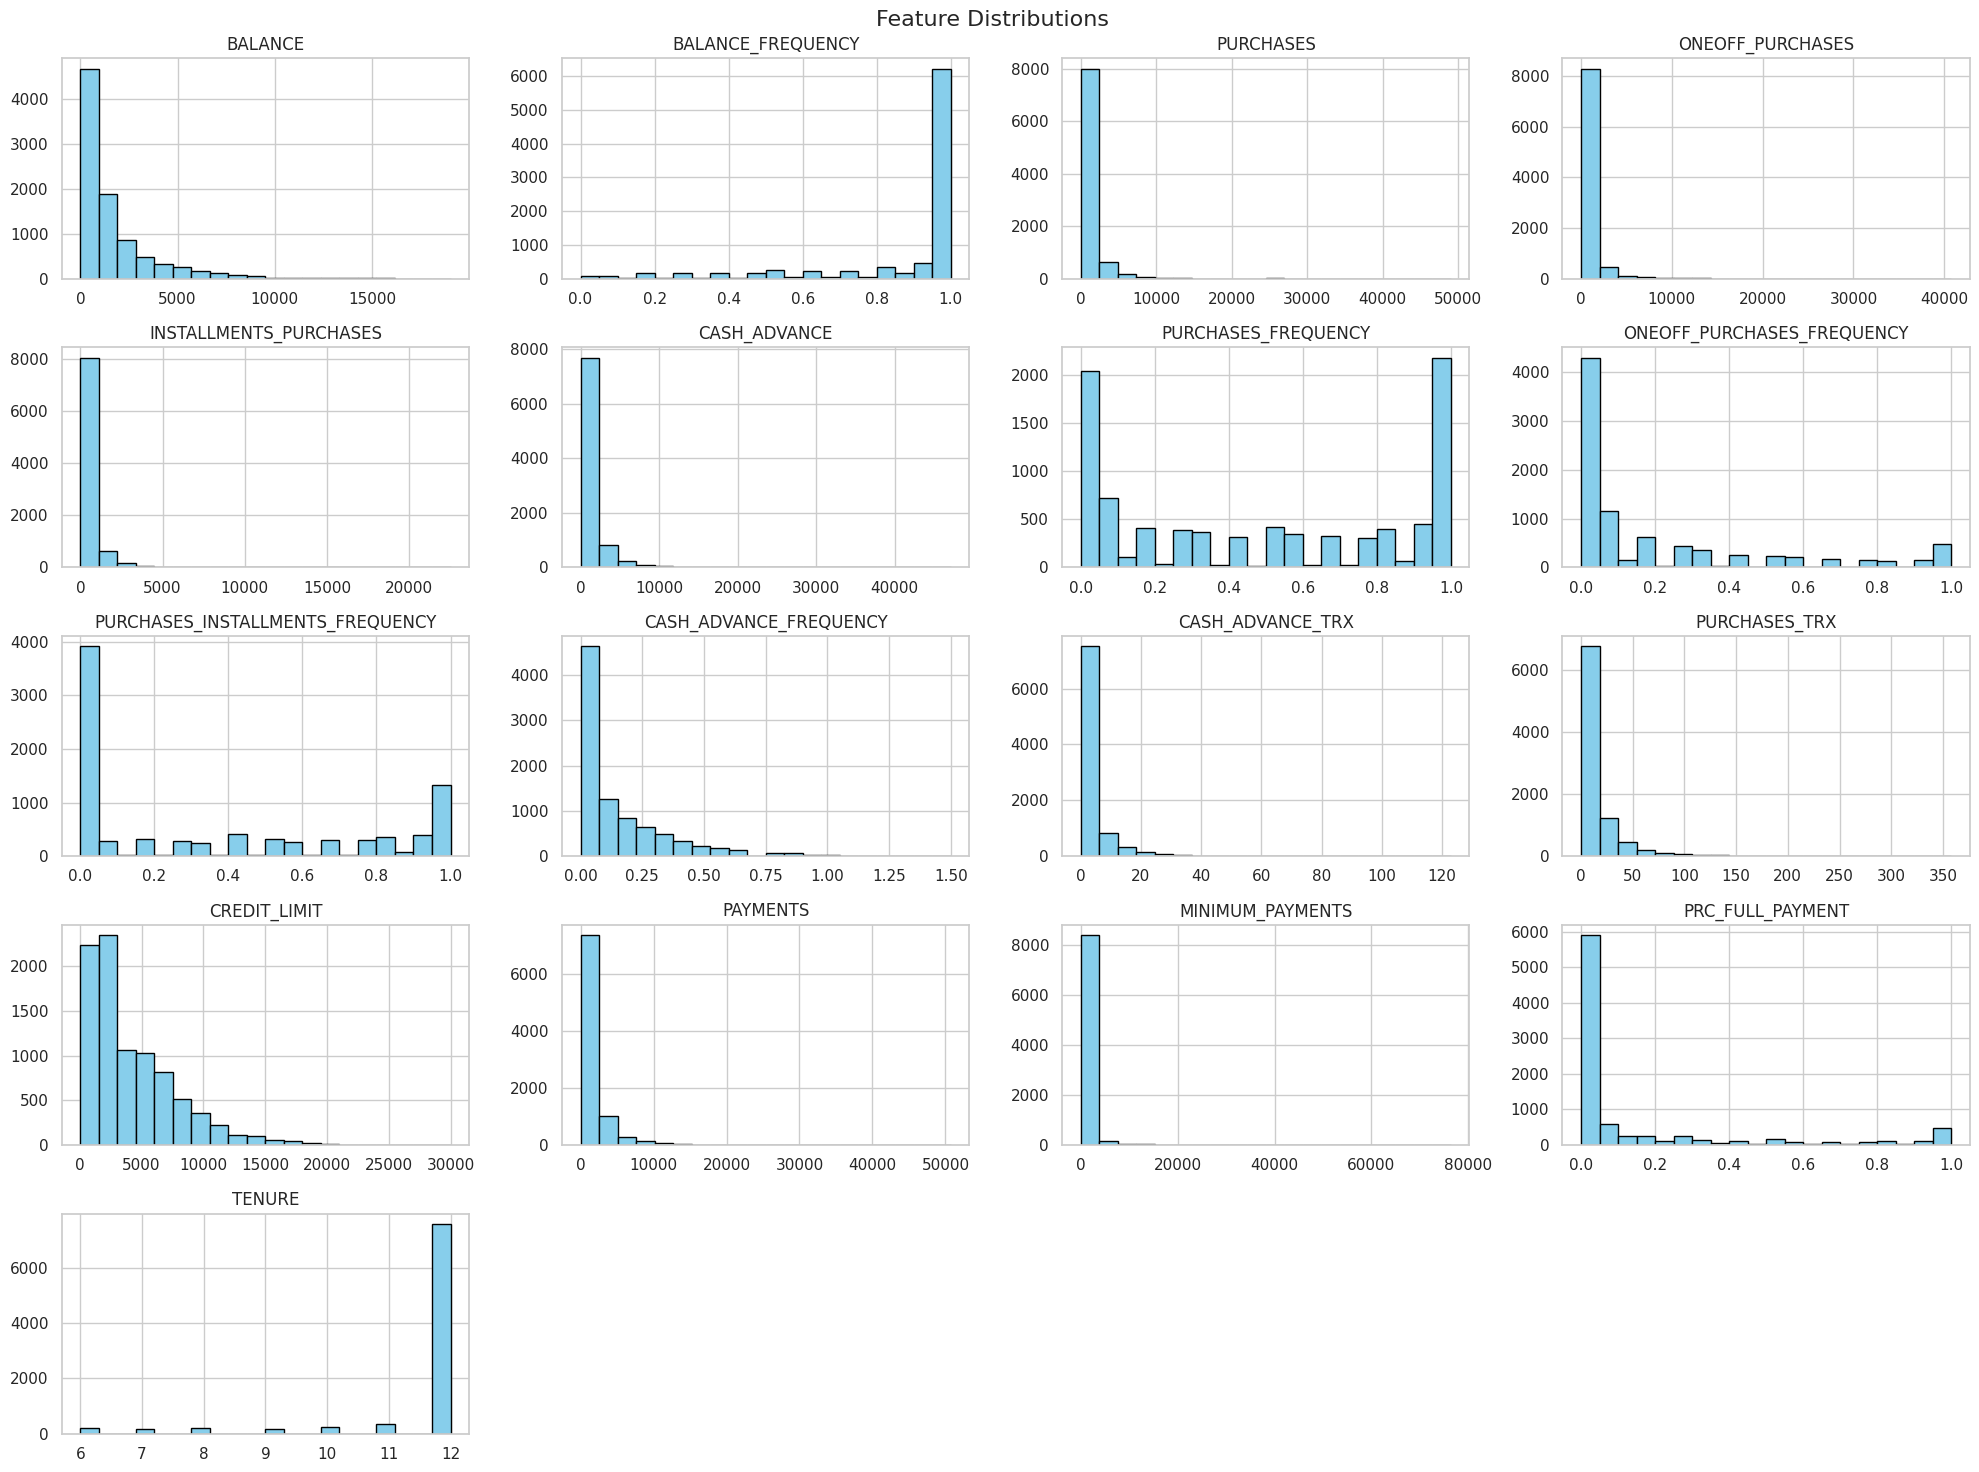

In [ ]:
#Visualize Distributions
sns.set(style="whitegrid")
df.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

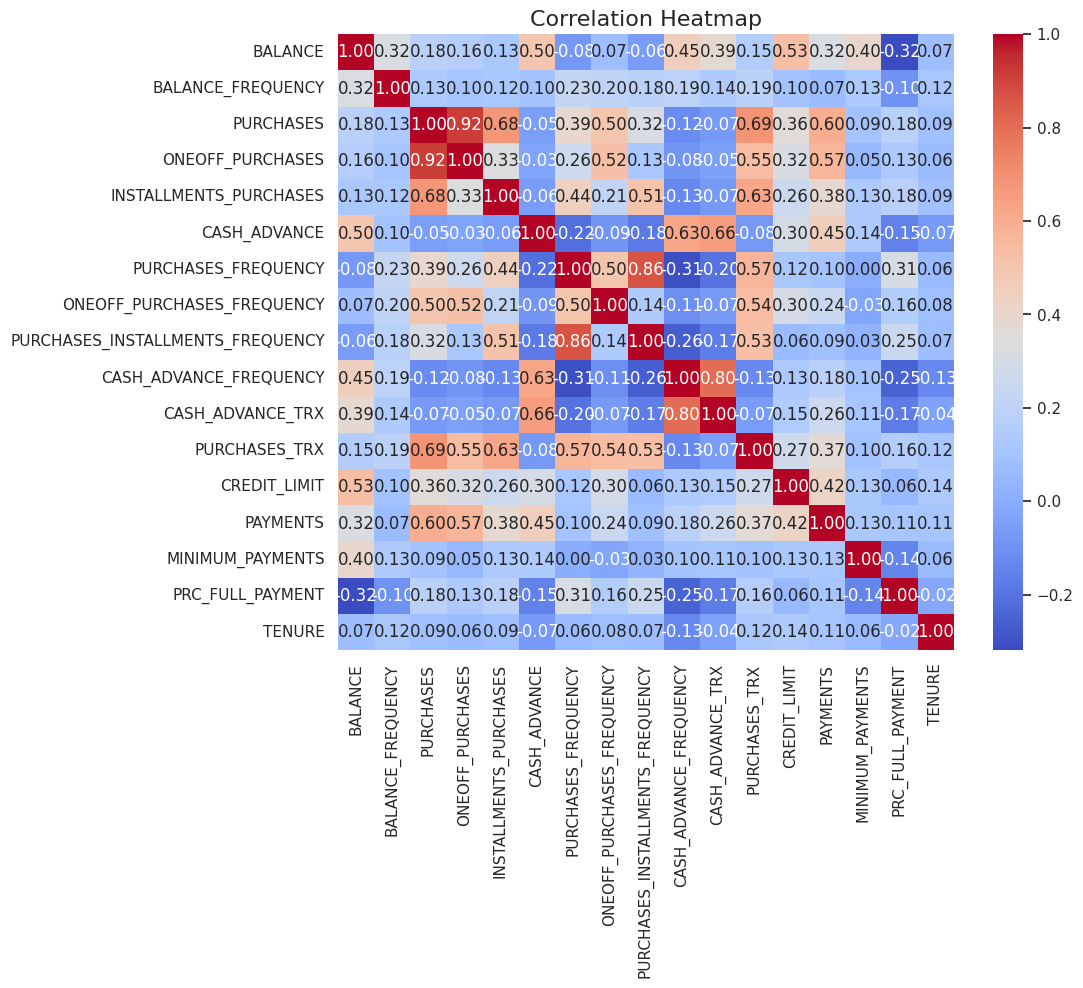

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
#exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

#Drop irrelevant columns
df.drop(["CUST_ID", "TENURE"], axis=1, inplace=True)

In [ ]:
#Handle missing values
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(), inplace=True)

<ipython-input-10-3ca72058faab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)
<ipython-input-10-3ca72058faab>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
#log-transform skewed features (to reduce skewness)
#use log1p to handle zero values safely
skewed_features = [
    "BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE", "PAYMENTS", "MINIMUM_PAYMENTS"]

for col in skewed_features:
    df[col] = np.log1p(df[col])

In [ ]:
#Feature scaling (Standardization)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.824484,-0.829841,-0.525551
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,1.065033,0.908184,0.234227
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.119300,0.450407,-0.525551
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-4.161996,-0.144271,-0.525551
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.064979,-0.351833,-0.525551


<Figure size 2000x1500 with 0 Axes>

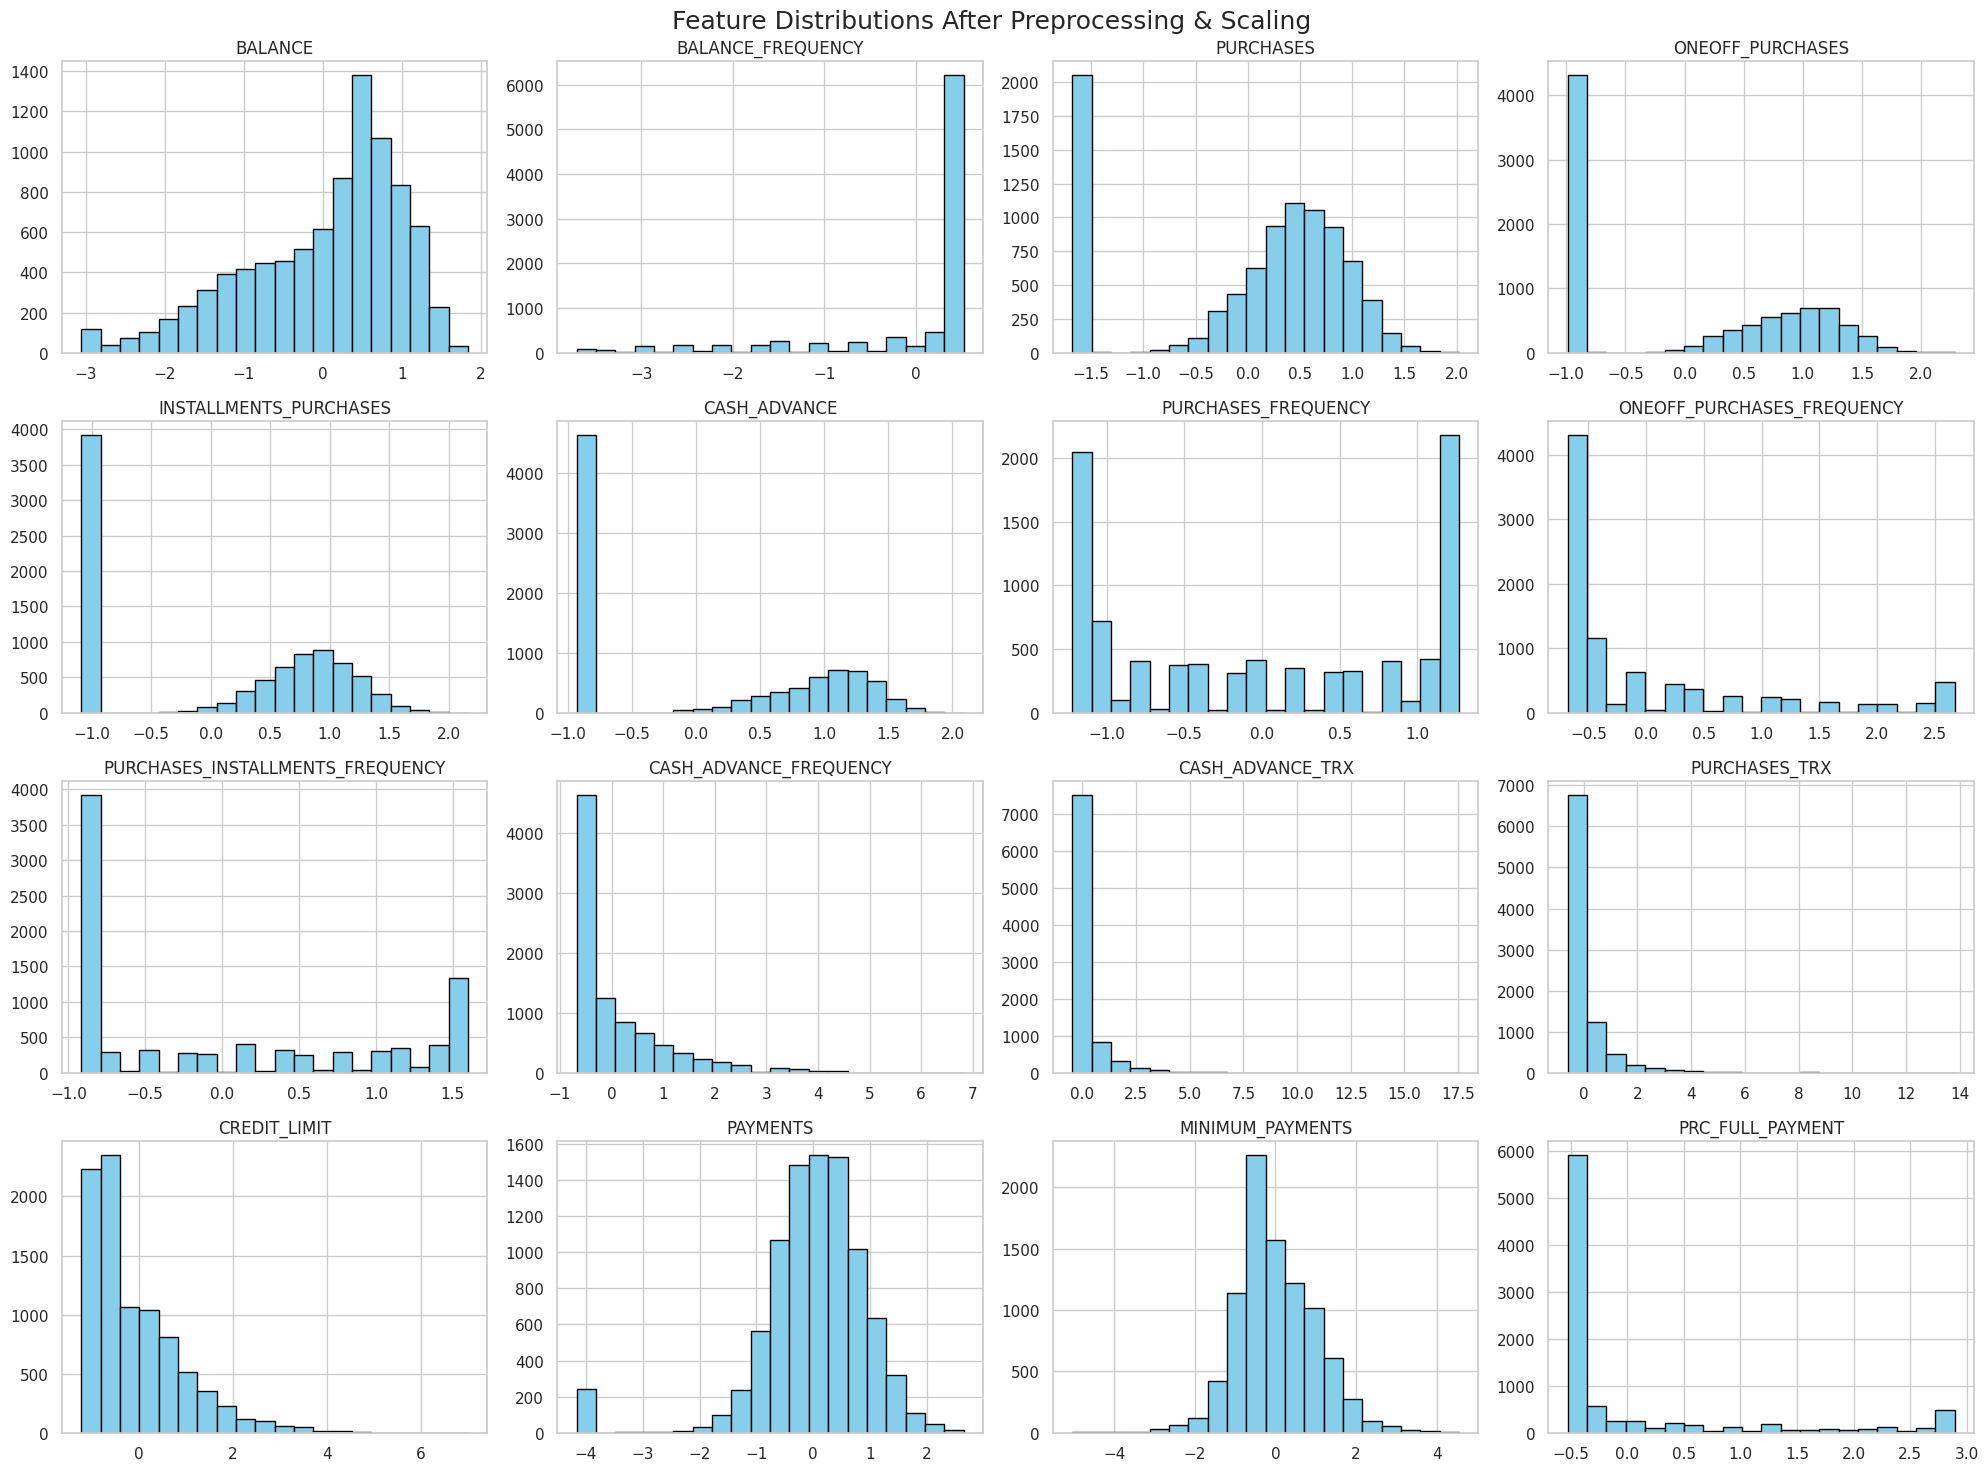

In [ ]:
#final visualization
plt.figure(figsize=(20, 15))
df_scaled.hist(bins=20, edgecolor='black', color='skyblue', figsize=(20, 15))
plt.suptitle("Feature Distributions After Preprocessing & Scaling", fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
df_scaled.head(), df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

(    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
 0 -1.205218          -0.249434  -0.113532         -0.987090   
 1  0.948918           0.134325  -1.679855         -0.987090   
 2  0.824993           0.518084   0.600727          1.062022   
 3  0.624653          -1.016953   0.827499          1.265778   
 4  0.271260           0.518084  -0.708481         -0.114307   
 
    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
 0                0.394480     -0.930733            -0.806490   
 1               -1.087454      1.528788            -1.221758   
 2               -1.087454     -0.930733             1.269843   
 3               -1.087454      0.564372            -1.014125   
 4               -1.087454     -0.930733            -1.014125   
 
    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
 0                   -0.678661                         -0.707313   
 1                   -0.678661                         -0.916995   
 2                

Second step: Choosing the Right Number of Clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
clusters_range =range(2, 11)
inertia =[]
silhouette_scores =[]

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

Text(0, 0.5, 'Inertia')

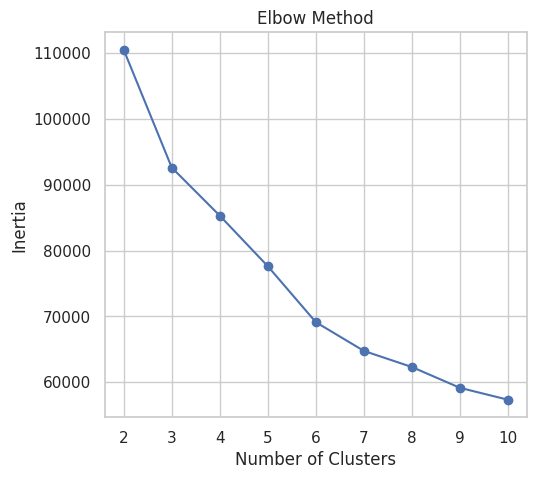

In [ ]:
#Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(clusters_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

the most likely candidates for the elbow are around 3 or 4 clusters, as the drop in inertia becomes less pronounced after that.

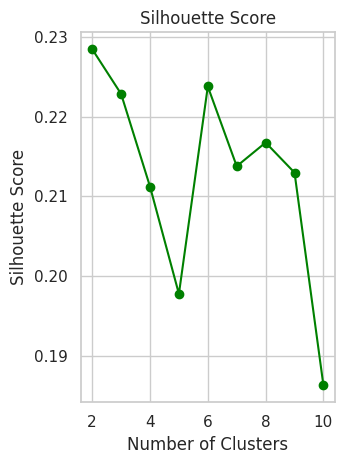

In [ ]:
#Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(clusters_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

The highest silhouette score in the given data is 0.23 (likely for 2 clusters), and the score decreases as the number of clusters increases.

This suggests that 2 clusters might be the most optimal based on silhouette score alone, as higher scores indicate better clustering.

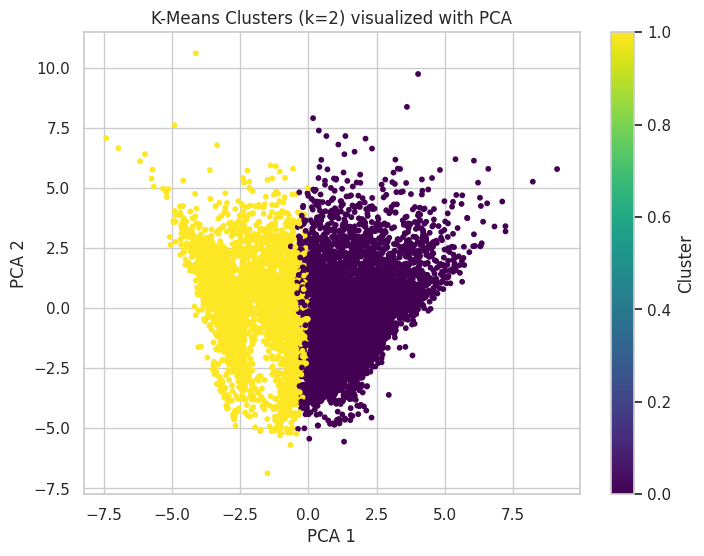

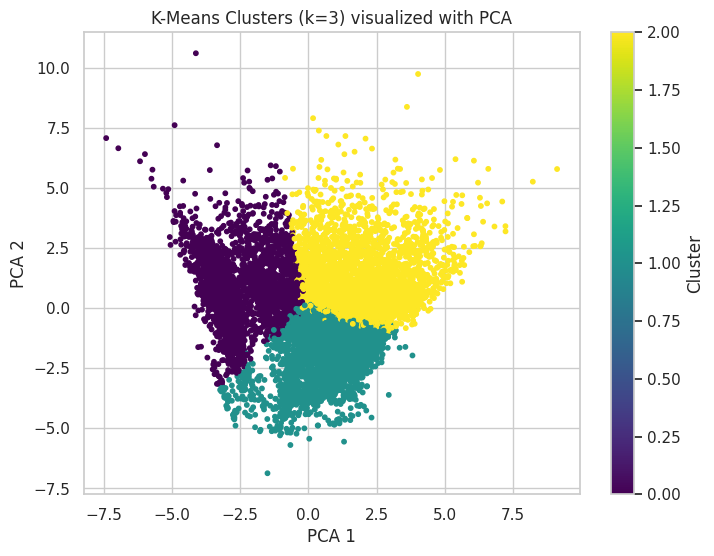

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

def train_and_plot(k):
    # Train KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    #PCA reduced data
    plt.figure(figsize=(8,6))
    plt.scatter(df_pca[:,0], df_pca[:,1], c=labels, cmap='viridis', s=10)
    plt.title(f"K-Means Clusters (k={k}) visualized with PCA")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(label='Cluster')
    plt.show()

    return kmeans, labels

#k=2
kmeans_2, labels_2 = train_and_plot(2)

#k=3
kmeans_3, labels_3 = train_and_plot(3)


In [ ]:
# Add cluster labels to the original scaled dataframe
df_scaled_k2 = df_scaled.copy()
df_scaled_k2['Cluster'] = labels_2

df_scaled_k3 = df_scaled.copy()
df_scaled_k3['Cluster'] = labels_3

# Calculate mean of each feature by cluster for k=2
cluster_profile_k2 = df_scaled_k2.groupby('Cluster').mean()

# Calculate mean of each feature by cluster for k=3
cluster_profile_k3 = df_scaled_k3.groupby('Cluster').mean()

print("Cluster Profiles for k=2:")
print(cluster_profile_k2)
print("\nCluster Profiles for k=3:")
print(cluster_profile_k3)


Cluster Profiles for k=2:
          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
0       -0.202461           0.065979   0.637303          0.269592   
1        0.254775          -0.083027  -0.801976         -0.339252   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                      0.691204     -0.494736             0.751113   
1                     -0.869805      0.622571            -0.945194   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.343706                          0.655745   
1                         -0.432516                         -0.825183   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                                                

Based on the Elbow method, silhouette scores, and cluster visualization, 3 clusters represent an optimal balance between capturing meaningful customer distinctions and maintaining interpretability. The 3-cluster segmentation reveals distinct groups of cash advance users, inactive customers, and active high spenders, providing clear targets for tailored business strategies.

third: Customer Segmentation

In [ ]:
#Reload original data to include customer IDs
df_original = pd.read_csv("CC GENERAL.csv")
df_clean = df_original.copy()
df_clean["CREDIT_LIMIT"] = df_clean["CREDIT_LIMIT"].fillna(df_clean["CREDIT_LIMIT"].mean())
df_clean["MINIMUM_PAYMENTS"] = df_clean["MINIMUM_PAYMENTS"].fillna(df_clean["MINIMUM_PAYMENTS"].median())

#Assign cluster labels from k=3 model
df_clean["Cluster"] = labels_3

#counts per cluster
cluster_counts = df_clean["Cluster"].value_counts()

# Drop CUST_ID before profiling
df_for_profile = df_clean.drop(columns=["CUST_ID"])

#average profile for each cluster
cluster_profiles = df_for_profile.groupby("Cluster").mean()

print("customers per cluster:")
print(cluster_counts)

print("\nCluster Profiles:")
print(cluster_profiles)


customers per cluster:
Cluster
0    3072
2    2991
1    2887
Name: count, dtype: int64

Cluster Profiles:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        2389.381919           0.931715   144.364899        116.188311   
1         203.838370           0.711126   471.278777        175.824700   
2        2030.554021           0.981719  2398.733688       1483.710488   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     28.313457   2113.231066             0.094626   
1                    295.946086     48.760248             0.530738   
2                    915.305961    711.561279             0.857809   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                         

Cluster 0 – Cash Advance Reliant Customers
High balance (~2,390)

Very low purchase frequency (0.09)

Extensive cash advance activity (avg. advance = 2,113, ~7 transactions)

Low full payment ratio (3%)

Credit limit ~4,300

Insight: These users rely heavily on cash advances, rarely make purchases, and hardly pay their balances in full. They may be credit-risky or using the card primarily for liquidity needs.

Cluster 1 – Inactive or Low-Engagement Customers
Low balance and low activity overall

Average purchases (~471), mostly via installments

Almost no cash advances

Low payments and minimum payments

Best full payment ratio (27%)

Lowest credit limit (~3,300)

Insight: These customers use their cards sparingly and are low-maintenance for the business. Some may be new users or inactive accounts.

Cluster 2 – High Spenders & Frequent Users
High balance (~2,030)

Very high purchases (~2,398), often one-off

High frequency of use (0.85), many transactions (~34)

Healthy payments, but not the highest full payment ratio (16%)

Highest credit limit (~5,835)

Insight: These are valuable, high-activity customers. They use their credit lines actively, make frequent purchases, and maintain significant repayment behavior.

4. Visualization and Analysis

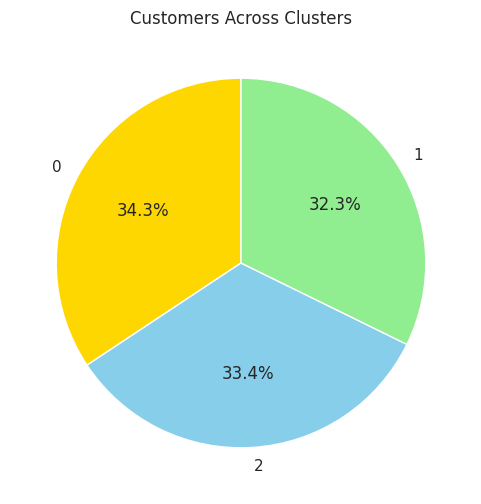

In [ ]:
# Pie chart of cluster sizes
cluster_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=['gold', 'skyblue', 'lightgreen'])
plt.title("Customers Across Clusters")
plt.ylabel("")
plt.show()


This chart shows the proportion of customers in each segment.

Business Insight:
The customer base is fairly evenly split across the three clusters. Strategies should target each segment proportionately, without ignoring any group.

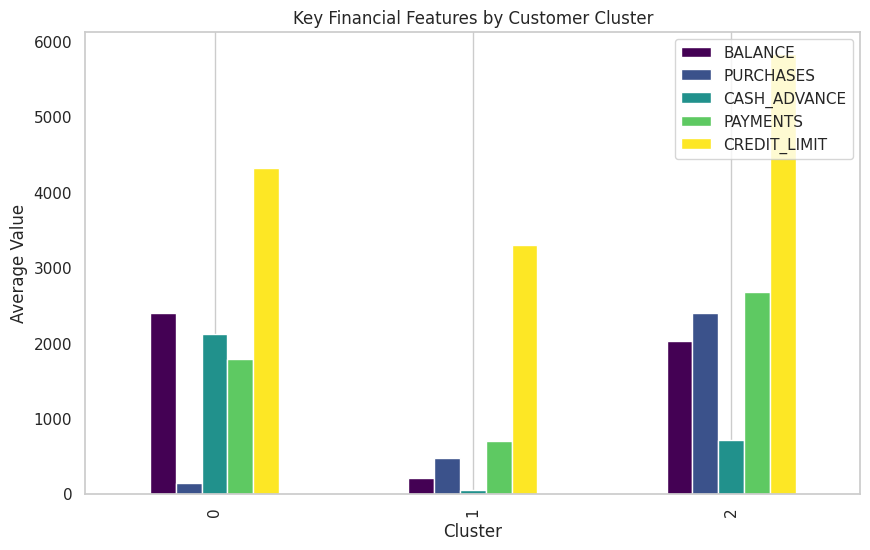

In [ ]:
# Plot select features
features_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']
cluster_profiles[features_to_plot].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Key Financial Features by Customer Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()


This bar plot highlights the behavioral differences across clusters in terms of spending, payments, and borrowing.

Business Insight:
Cluster 2 (high spenders) dominates in purchases and payments, Cluster 0 is cash-advance heavy, and Cluster 1 shows very low overall activity — perfect candidates for tailored strategies.

<ipython-input-31-12e3c04fd0e0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="PURCHASES_FREQUENCY", data=df_clean, palette='pastel')


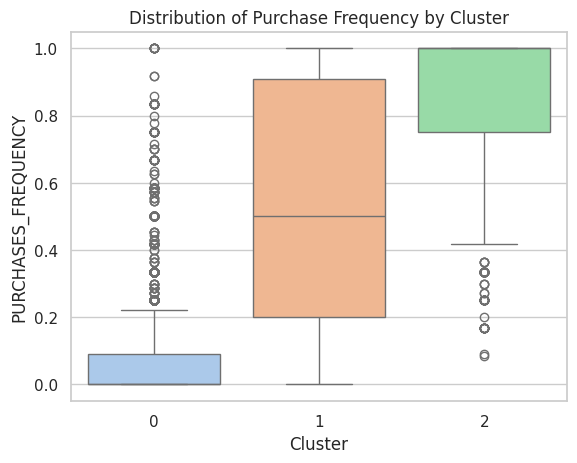

In [ ]:
sns.boxplot(x="Cluster", y="PURCHASES_FREQUENCY", data=df_clean, palette='pastel')
plt.title("Distribution of Purchase Frequency by Cluster")
plt.show()


This shows how often customers in each cluster use their card to make purchases.

Business Insight:
Cluster 2 shows high engagement; Cluster 0 almost none. Marketing should encourage Cluster 1 to use their card more, while Cluster 0 may need alternative financial products.

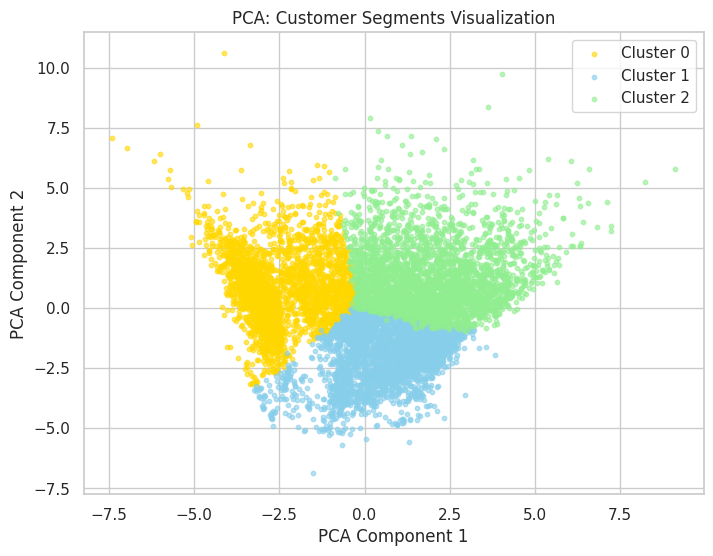

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['gold', 'skyblue', 'lightgreen']
for cluster in np.unique(labels_3):
    plt.scatter(df_pca[labels_3 == cluster, 0], df_pca[labels_3 == cluster, 1],
                label=f'Cluster {cluster}', s=10, alpha=0.6, color=colors[cluster])
plt.title("PCA: Customer Segments Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


This scatter plot shows how well-separated the clusters are in reduced dimensions.

Business Insight:
The PCA confirms that the chosen segmentation captures distinct behavior groups — not randomly spread or overlapping.

Optional for Advanced Students:

Dimensionality Reduction Before Clustering
PCA was used for visualization, but it can also reduce noise and improve clustering performance.

Apply PCA to reduce features (e.g., retain 95% variance), then cluster on reduced data.

Speeds up clustering, avoids overfitting, and enhances separation.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(df_scaled)


Alternative Clustering Algorithms
DBSCAN: Density-based, handles outliers well, no need to define k.

Agglomerative Clustering: Useful if the data has a clear hierarchy or nested clusters.


In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5, min_samples=5).fit(df_scaled)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca = PCA(n_components=0.95, random_state=42)
df_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(df_pca)

print("Silhouette Score for KMeans with PCA:", silhouette_score(df_pca, labels_kmeans))


Silhouette Score for KMeans with PCA: 0.23431630030572395
